In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [24]:
import os
print(os.path.expanduser("~"))

/Users/haticecakir


In [25]:
df = pd.read_csv("/Users/haticecakir/Downloads/breast_cancer.csv")
print("Veri setindeki sütunlar:")
print(df.columns)
df['diagnosis'] = df['diagnosis'].map({'B': 'Benign', 'M': 'Malignant'})
df.head()

Veri setindeki sütunlar:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
df['diagnosis'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [27]:

df['diagnosis'].value_counts()
# select count(diagnosis), diagnosis from tablo_ismi group by diagnosis

diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

In [28]:
# Features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
 68     859471        9.029         17.33           58.79      250.5   
 181    873593       21.090         26.57          142.70     1311.0   
 63     859196        9.173         13.86           59.20      260.9   
 248  88466802       10.650         25.22           68.01      347.0   
 60     858970       10.170         14.88           64.55      311.9   
 
      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 68           0.10660           0.14130         0.31300              0.04375   
 181          0.11410           0.28320         0.24870              0.14960   
 63           0.07721           0.08751         0.05988              0.02180   
 248          0.09657           0.07234         0.02379              0.01615   
 60           0.11340           0.08061         0.01084              0.01290   
 
      symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
 68         

In [29]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

X_train[:5]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


array([[-0.23712699, -1.44075296, -0.43531947, -1.36208497, -1.1391179 ,
         0.78057331,  0.71892128,  2.82313451, -0.11914956,  1.09266219,
         2.45817261, -0.26380039, -0.01605246, -0.47041357, -0.47476088,
         0.83836493,  3.25102691,  8.43893667,  3.39198733,  2.62116574,
         2.06120787, -1.23286131, -0.47630949, -1.24792009, -0.97396758,
         0.72289445,  1.18673232,  4.67282796,  0.9320124 ,  2.09724217,
         1.88645014,         nan],
       [-0.23702031,  1.97409619,  1.73302577,  2.09167167,  1.85197292,
         1.319843  ,  3.42627493,  2.01311199,  2.66503199,  2.1270036 ,
         1.55839569,  0.80531919, -0.81268678,  0.75195659,  0.87716951,
        -0.89605315,  1.18122247,  0.18362761,  0.60059598, -0.31771686,
         0.52963649,  2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,
         0.76192793,  3.26560084,  1.92862053,  2.6989469 ,  1.89116053,
         2.49783848,         nan],
       [-0.23712907, -1.39998202, -1.24962228, -1.3452

In [ ]:
# Fit and transform the training data
X_tum = scaler.fit_transform(X)


# Initialize the SVM model
svm_model2 = SVC(kernel='linear', random_state=42)

# Train the model
svm_model2.fit(X_tum, y)

# Make predictions
y_pred = svm_model2.predict(X_tum)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y, y_pred))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

# Veri setini yükle
data = load_breast_cancer()
X = data.data
y = data.target

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eğit
svm_model2 = SVC(kernel='linear', random_state=42)
svm_model2.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yap
y_pred = svm_model2.predict(X_test_scaled)

# Performans değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 95.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))

Accuracy: 95.61%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

X_vis = df.iloc[:, [0, 1]].values
y_vis = df['diagnosis'].values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)


svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)


def plot_decision_boundaries(X, y, model, title='SVM Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='viridis')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.title(title)
    plt.show()


plot_decision_boundaries(X_test_vis, y_test_vis, svm_model_vis, title='SVM Decision Boundary (Breast Cancer Dataset)')


ValueError: could not convert string to float: 'Benign'

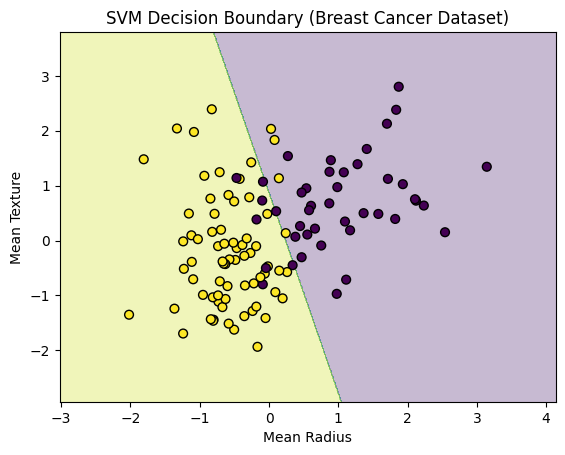

In [42]:
X_vis = X[:, :2]
y_vis = y 

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

def plot_decision_boundaries(X, y, model, title='SVM Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='viridis')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.title(title)
    plt.show()

plot_decision_boundaries(X_test_vis, y_test_vis, svm_model_vis, title='SVM Decision Boundary (Breast Cancer Dataset)')


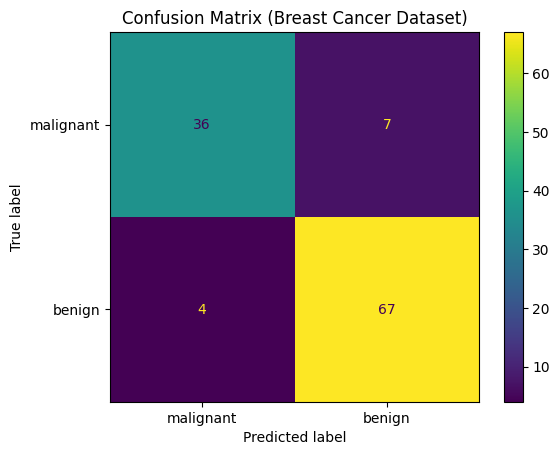

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_vis = svm_model_vis.predict(X_test_vis)

cm = confusion_matrix(y_test_vis, y_pred_vis)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Breast Cancer Dataset)")
plt.show()
